In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plot_reset as ps
import comp_many as cm
import os

## different quiescent phase plot cannot be used: they end at different times (this is more important than the number of bursts)

In [2]:
ps.reset_plt(20, 20)

In [3]:
ln = np.log10(np.logspace(4, 7, 15))
ln

array([4.        , 4.21428571, 4.42857143, 4.64285714, 4.85714286,
       5.07142857, 5.28571429, 5.5       , 5.71428571, 5.92857143,
       6.14285714, 6.35714286, 6.57142857, 6.78571429, 7.        ])

In [4]:
tb = np.linspace(10, 50, 15)
tb

array([10.        , 12.85714286, 15.71428571, 18.57142857, 21.42857143,
       24.28571429, 27.14285714, 30.        , 32.85714286, 35.71428571,
       38.57142857, 41.42857143, 44.28571429, 47.14285714, 50.        ])

In [5]:
tqs = np.logspace(2, 5, 15)
tqs

array([   100.        ,    163.7893707 ,    268.26957953,    439.39705608,
          719.685673  ,   1178.76863479,   1930.69772888,   3162.27766017,
         5179.47467923,   8483.42898244,  13894.95494373,  22758.45926075,
        37275.93720315,  61054.02296585, 100000.        ])

In [6]:
tqs_same = np.logspace(2.69, 4, 15)
tqs_same

array([  489.77881937,   607.53517618,   753.60341382,   934.79049048,
        1159.53994511,  1438.32537664,  1784.1385265 ,  2213.09470961,
        2745.18380773,  3405.20182237,  4223.9063987 ,  5239.45016937,
        6499.15871379,  8061.73598785, 10000.        ])

In [27]:
np.log10(tqs_same)

array([2.69      , 2.78357143, 2.87714286, 2.97071429, 3.06428571,
       3.15785714, 3.25142857, 3.345     , 3.43857143, 3.53214286,
       3.62571429, 3.71928571, 3.81285714, 3.90642857, 4.        ])

In [28]:
tqs_same = tqs_same[1:] # first to override each other....

In [7]:
Av = np.linspace(1, 50, 15)
Av

array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ,
       39.5, 43. , 46.5, 50. ])

In [8]:
ks = np.logspace(-18, -16, 15)
ks

array([1.00000000e-18, 1.38949549e-18, 1.93069773e-18, 2.68269580e-18,
       3.72759372e-18, 5.17947468e-18, 7.19685673e-18, 1.00000000e-17,
       1.38949549e-17, 1.93069773e-17, 2.68269580e-17, 3.72759372e-17,
       5.17947468e-17, 7.19685673e-17, 1.00000000e-16])

In [17]:
spec1 = ['CO', 'HCO', 'H2CO', 'CH3O', 'CH2OH', 'CH3OH']
spec2 = ['HCOOCH3', 'HCOOH', 'NH2CHO', 'HNCO']

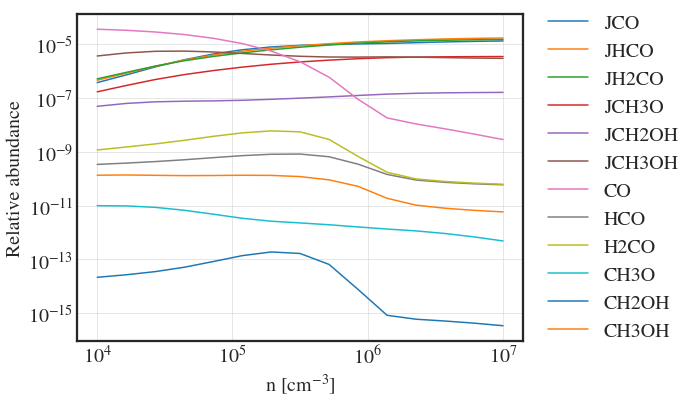

In [20]:
X = cm.comp_spec('diff_n', spec1)
cm.plot(10**ln, X, r'n [cm$^{-3}$]', figname = 'burst_noburst_fig/dens1.pdf')

In [18]:
10**ln

array([   10000.        ,    16378.93706954,    26826.9579528 ,
          43939.70560761,    71968.56730012,   117876.86347936,
         193069.77288832,   316227.76601684,   517947.46792312,
         848342.89824407,  1389495.49437314,  2275845.92607479,
        3727593.72031494,  6105402.29658533, 10000000.        ])

The ice abundance slowly increase with density due to the decreasing freeze-out time, hence more of them can be created. The gas abundances increase (__why?__) until they turn back and drop due to increased freeze-out.

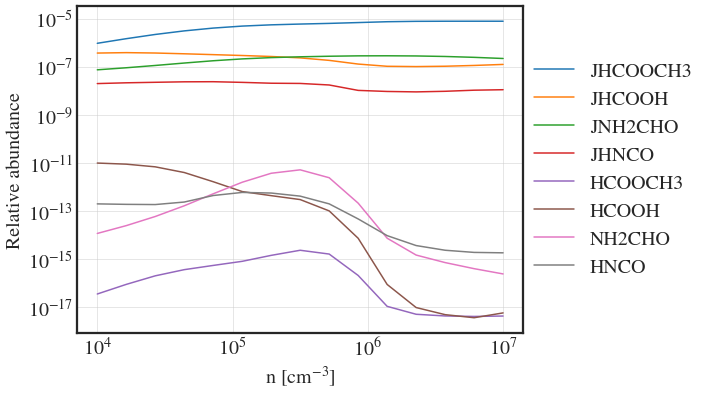

In [21]:
X = cm.comp_spec('diff_n', spec2)
cm.plot(10**ln, X, r'n [cm$^{-3}$]', figname = 'burst_noburst_fig/dens2.pdf')

Similar situation.

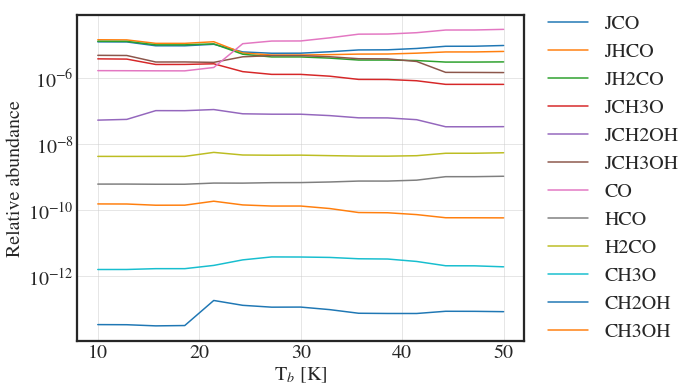

In [22]:
X = cm.comp_spec('diff_Tb', spec1)
cm.plot(tb, X, r'T$_b$ [K]', xscale = 'linear', figname = 'burst_noburst_fig/Tb1.pdf')

Methanol doesn't need bursts to form, its abundance could also decrease for certain temperature. The more complex species, however, need higher than 10 K to form.

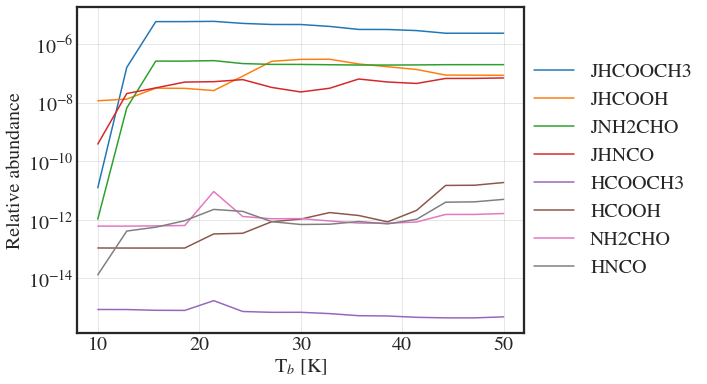

In [23]:
X = cm.comp_spec('diff_Tb', spec2)
cm.plot(tb, X, r'T$_b$ [K]', xscale = 'linear', figname = 'burst_noburst_fig/Tb2.pdf')

H2CO ice decreases with increasing temperature, but the gas remains constant. This means that insted of evaporating (probably needs higher temperature) it reacts. The HCOOH ice prefers the warmer bursts.

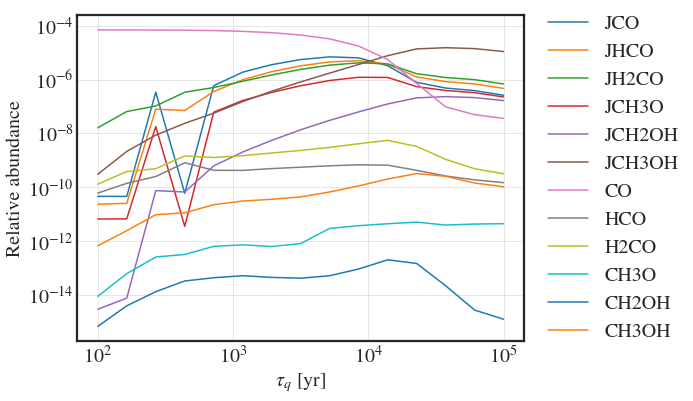

In [14]:
X = cm.comp_spec('diff_tq', spec1)
cm.plot(tqs, X, r'$\tau_q$ [yr]')

no idea

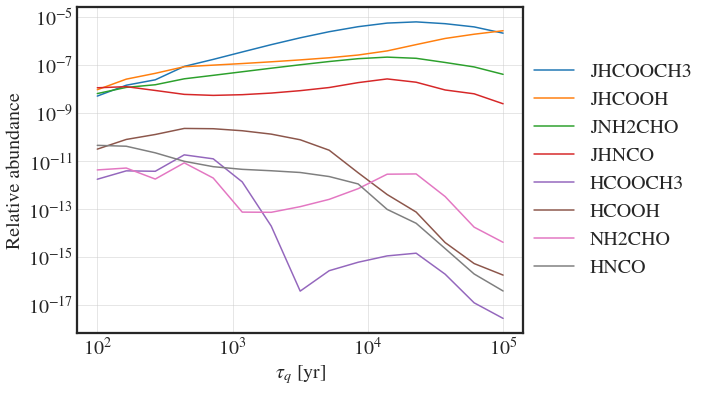

In [24]:
X = cm.comp_spec('diff_tq', spec2)
cm.plot(tqs, X, r'$\tau_q$ [yr]')

Ice HCOOH still prefers the cols (10 K) environment, so more forms for longer quiescent phases. The others have a maximum around 10000 yr of quiescent phase.After that,they probably form something else __???__

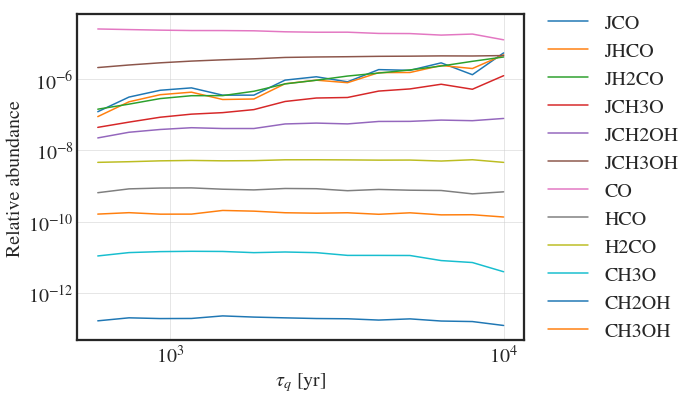

In [41]:
X = cm.comp_spec('diff_tq_same_tf', spec1)
cm.plot(tqs_same, X, r'$\tau_q$ [yr]', figname = 'burst_noburst_fig/diff_tq_same_tf1.pdf')

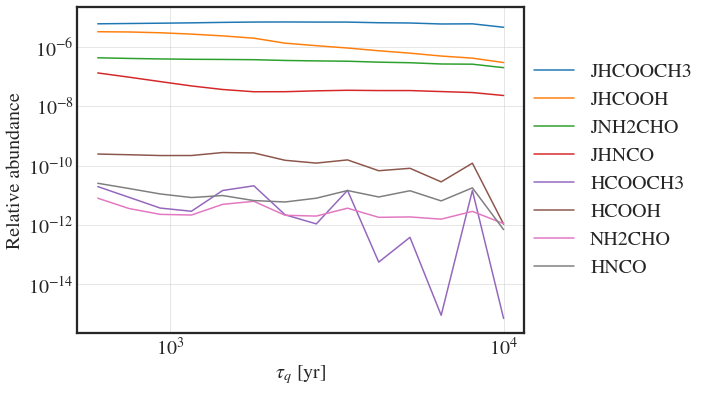

In [42]:
X = cm.comp_spec('diff_tq_same_tf', spec2)
cm.plot(tqs_same, X, r'$\tau_q$ [yr]', figname = 'burst_noburst_fig/diff_tq_same_tf2.pdf')

In [32]:
import plot_spec as ps

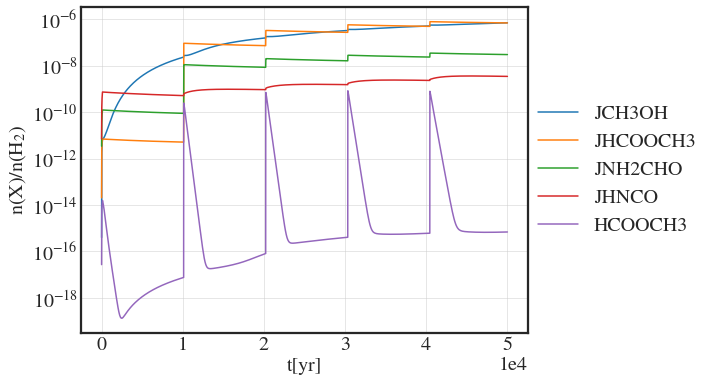

In [43]:
t, X = ps.get_species(['JCH3OH', 'JHCOOCH3', 'JNH2CHO', 'JHNCO', 'HCOOCH3'], 'pnautilus_own/diff_tq_same_tf/tq4_0/')
ps.plot_species(t, X, ['JCH3OH', 'JHCOOCH3', 'JNH2CHO', 'JHNCO', 'HCOOCH3'])#, figname = 'burst_noburst_fig/tq_longest.pdf')

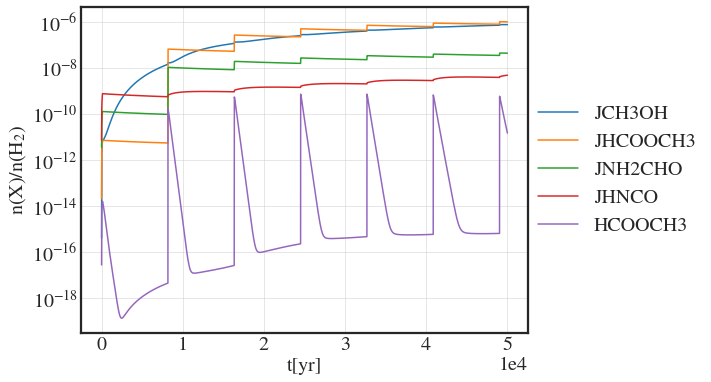

In [44]:
t, X = ps.get_species(['JCH3OH', 'JHCOOCH3', 'JNH2CHO', 'JHNCO', 'HCOOCH3'], 'pnautilus_own/diff_tq_same_tf/tq3_9/')
ps.plot_species(t, X, ['JCH3OH', 'JHCOOCH3', 'JNH2CHO', 'JHNCO', 'HCOOCH3'])#, figname = 'burst_noburst_fig/tq_shortest.pdf')

In [ ]:
X = cm.comp_spec('diff_cr', spec1)
cm.plot(ks, X, r'$\xi$ [s$^{-1}$]')

Increasing cosmic ray ionisation destroys complex molecules and also heats up the grains so less complex ice is formed. HCOOCH3 and NH2CHO gasincreases due to cr induced evaporation __???__

In [ ]:
X = cm.comp_spec('diff_cr', spec2)
cm.plot(ks, X, r'$\xi$ [s$^{-1}$]')

Similar, but HCOOH ice increases at the beginning so there might be a step which prefers sime CR, but then it's too much.

In [ ]:
X = cm.comp_spec('diff_Av', spec1)
cm.plot(Av, X, 'Av', xscale = 'linear')

Pretty consistent, but what's happenning at 12 mag __???__

In [ ]:
X = cm.comp_spec('diff_Av', spec2)
cm.plot(Av, X, 'Av', xscale = 'linear')